In [1]:
import pandas as pd
import pickle
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pickle.load(open('/Users/saklenshaikh/Desktop/Ds Term 2/Ims-Final-Project/Amazon/amazontweet_data1.pkl','rb'))

In [3]:
data.head()

,Date,user,Tweet
0,2022-09-09 23:12:33+00:00,amazon,@AllieK02 We're sorry for the inconvenience. H...
1,2022-09-09 18:29:45+00:00,amazon,"@IM4LOSER Hi, there. Using the link provided b..."
2,2022-09-09 14:54:42+00:00,amazon,@IM4LOSER We would like to take a closer look ...
3,2022-09-09 14:38:48+00:00,amazon,"@IM4LOSER Hello there, we're sorry for this. A..."
4,2022-09-09 13:37:30+00:00,amazon,@MugaXX Amazon公式です。\nご不快の念をおかけしております。\n詳細の確認をさ...


In [5]:
data=pd.DataFrame(data.Tweet)

data.head()

,Tweet
0,@AllieK02 We're sorry for the inconvenience. H...
1,"@IM4LOSER Hi, there. Using the link provided b..."
2,@IM4LOSER We would like to take a closer look ...
3,"@IM4LOSER Hello there, we're sorry for this. A..."
4,@MugaXX Amazon公式です。\nご不快の念をおかけしております。\n詳細の確認をさ...


In [6]:
data.iloc[760]

"@abheppe  Hello. We're sorry for the delivery issue. This isn't the service we strive for. When looking at the tracking from the order details here: https://t.co/SsGOmzG2p2, can you confirm the carrier assigned to deliver your packages? -Mary"

# Data Cleaning And Preprocessing

In [7]:
data.Tweet=data.Tweet.str.lower()

In [8]:
data.iloc[760,0]

"@abheppe  hello. we're sorry for the delivery issue. this isn't the service we strive for. when looking at the tracking from the order details here: https://t.co/ssgomzg2p2, can you confirm the carrier assigned to deliver your packages? -mary"

In [9]:
data

,Tweet
0,@alliek02 we're sorry for the inconvenience. h...
1,"@im4loser hi, there. using the link provided b..."
2,@im4loser we would like to take a closer look ...
3,"@im4loser hello there, we're sorry for this. a..."
4,@mugaxx amazon公式です。\nご不快の念をおかけしております。\n詳細の確認をさ...
...,...
4995,@kristilouwho7 we love it! your costume is goi...
4996,@robhowv we think this pic is ooh-so-adorable!...
4997,@otheratma if the resolution shared over the e...
4998,@ahmonieee hello! we're sorry for the unexpect...


In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(Tweet):
    text_nopunt="".join([c 
                         for c in data
                         if c not in string.punctuation])
    return text_nopunt

In [12]:
data.iloc[760,0]

"@abheppe  hello. we're sorry for the delivery issue. this isn't the service we strive for. when looking at the tracking from the order details here: https://t.co/ssgomzg2p2, can you confirm the carrier assigned to deliver your packages? -mary"

In [13]:
data.head()

,Tweet
0,@alliek02 we're sorry for the inconvenience. h...
1,"@im4loser hi, there. using the link provided b..."
2,@im4loser we would like to take a closer look ...
3,"@im4loser hello there, we're sorry for this. a..."
4,@mugaxx amazon公式です。\nご不快の念をおかけしております。\n詳細の確認をさ...


In [14]:
#data.Tweet=data.Tweet.apply(lambda x : remove_punctuation(x))

In [15]:
data

,Tweet
0,@alliek02 we're sorry for the inconvenience. h...
1,"@im4loser hi, there. using the link provided b..."
2,@im4loser we would like to take a closer look ...
3,"@im4loser hello there, we're sorry for this. a..."
4,@mugaxx amazon公式です。\nご不快の念をおかけしております。\n詳細の確認をさ...
...,...
4995,@kristilouwho7 we love it! your costume is goi...
4996,@robhowv we think this pic is ooh-so-adorable!...
4997,@otheratma if the resolution shared over the e...
4998,@ahmonieee hello! we're sorry for the unexpect...


# Remove URL

\S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
(+) == one or more occurance

In [16]:
data.Tweet = data.Tweet.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[760,0]

"@abheppe  hello. we're sorry for the delivery issue. this isn't the service we strive for. when looking at the tracking from the order details here:  can you confirm the carrier assigned to deliver your packages? -mary"

Remove Number

\d == Returns a match where the string contains digits (numbers from 0-9)
(+) == one or more occurance

In [19]:
data['Tweet'] = data['Tweet'].str.replace('\d+','')

In [20]:
data.iloc[760,0]

"@abheppe  hello. we're sorry for the delivery issue. this isn't the service we strive for. when looking at the tracking from the order details here:  can you confirm the carrier assigned to deliver your packages? -mary"

# Removing Stop Words

In [21]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
data.iloc[760,0]

"@abheppe  hello. we're sorry for the delivery issue. this isn't the service we strive for. when looking at the tracking from the order details here:  can you confirm the carrier assigned to deliver your packages? -mary"

In [74]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([abc 
                                                      for abc in x.split() # word tokenizer
                                                      if abc not in (stop)]))

In [81]:
data.iloc[760,0]

"@abheppe hello. we're sorry delivery issue. service strive for. looking tracking order details here: confirm carrier assigned deliver packages? -mary"

# Common Words

In [46]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package words is already up-to-date!


{'parotidean',
 'pintadoite',
 'roughish',
 'eat',
 'technographic',
 'takable',
 'unfulfillable',
 'Menobranchidae',
 'Blattodea',
 'Balawu',
 'Mantoidea',
 'mosstrooping',
 'nonacceptation',
 'krobylos',
 'promagistracy',
 'catechumenical',
 'Myxococcus',
 'Simeonite',
 'neurinoma',
 'rental',
 'glove',
 'opt',
 'Madeira',
 'transire',
 'molest',
 'sebundy',
 'capillarimeter',
 'cysterethism',
 'overindustrialization',
 'factionist',
 'nectophore',
 'paroeciously',
 'demersion',
 'oviform',
 'briny',
 'Caribi',
 'mantissa',
 'homogene',
 'fomes',
 'clapboard',
 'fibroid',
 'nonpunctual',
 'immunization',
 'snaw',
 'holmos',
 'duraspinalis',
 'nutmegged',
 'anes',
 'knuckler',
 'wakif',
 'decal',
 'lealness',
 'sinuauricular',
 'infernalism',
 'trithioaldehyde',
 'interregna',
 'listing',
 'polyspondylous',
 'logomachical',
 'preimportance',
 'hungarite',
 'gruffish',
 'untruthful',
 'tod',
 'hypoglycemia',
 'unvirile',
 'cokelike',
 'octastyle',
 'redeserve',
 'areotectonics',
 'impe

In [47]:
# Apply a second round of cleaning
def clean_text_round2(Tweet):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    Tweet =  re.sub('tweet', '', Tweet) 
    Tweet =  re.sub('amazon|@amazon ','', Tweet)
    Tweet =  re.sub('delivery','', Tweet ) 
    Tweet =  re.sub(r"\b[a-zA-Z]\b", "", Tweet ) ## 1 alphabet like a or s
    Tweet =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", Tweet )  ## 2 alphabet like ab or ad & aA
    Tweet =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(Tweet)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return Tweet

In [48]:
import re

In [50]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.Tweet.apply( lambda x : clean_text_round2(x)))
data.iloc[760,0]


'hello sorry for the issue this the service strive for when looking the from the order here can you confirm the carrier assigned deliver your mary'

In [59]:
 ### Stemming
import nltk

# let's import the libraries
from nltk.stem.snowball import SnowballStemmer

#the most commonly used stemmer
#ss = SnowballStemmer("english") w_tokenizer = nltk.tokenize.WhitespaceTokenizer() lemmatizer = nltk.stem.WordNetLemmatizer()

#def SnowballStemmer_text(text): return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

#data.head()

#data['tweet'] = data.tweet.apply(lambda x :' '.join(SnowballStemmer_text(x))) data.head()

# Lemmatization

In [60]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
def lemmatize_text(Tweet):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(tweet)]

In [66]:
data.iloc[760,0]

'hello sorry for the issue this the service strive for when looking the from the order here can you confirm the carrier assigned deliver your mary'

## Strip extra whitespace

In [67]:
data.iloc[760,0]

'hello sorry for the issue this the service strive for when looking the from the order here can you confirm the carrier assigned deliver your mary'

In [69]:
data['Tweet'] = (data['Tweet'].astype("str").str.rstrip())
data.iloc[760,0]

'hello sorry for the issue this the service strive for when looking the from the order here can you confirm the carrier assigned deliver your mary'

# Finished Data Cleaning

# Term Document Matrix

In [70]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ably,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,freq
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117
ably,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,freq
0,aba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117
4,ably,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
1792,like,722
1846,love,714
1435,happy,661
1467,help,600
1721,know,519
1455,hear,460
2951,sorry,452
3219,thanks,445
2148,order,414
795,day,366


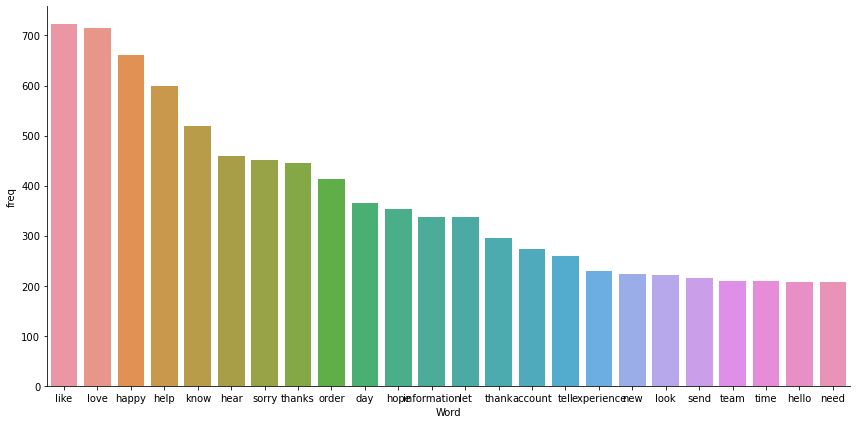

In [80]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=200] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [83]:
Tweet = " ".join(review for review in data.Tweet)
print ("There are {} words in the combination of all review.".format(len(Tweet)))

There are 397226 words in the combination of all review.


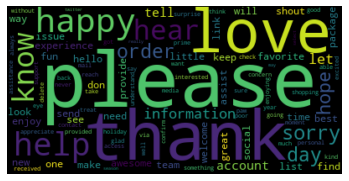

In [85]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="black",
                      collocations=False,
                       max_words=100).generate(Tweet)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

## Sentiment Analysis

In [86]:
data

,Tweet
0,sorry for the inconvenience here are some comm...
1,there the link provided above select something...
2,would like take closer look into this when you...
3,hello there sorry for this although don have a...
4,
...,...
4995,love your costume going awesome
4996,think this pic adorable what are some from the...
4997,the resolution over the from our team meet you...
4998,hello sorry for the unexpected wait could you ...


In [87]:
data = data.drop_duplicates(subset='Tweet') 

In [88]:
data

,Tweet
0,sorry for the inconvenience here are some comm...
1,there the link provided above select something...
2,would like take closer look into this when you...
3,hello there sorry for this although don have a...
4,
...,...
4994,course all the how old are they this year they...
4995,love your costume going awesome
4996,think this pic adorable what are some from the...
4997,the resolution over the from our team meet you...


In [90]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['Tweet'].apply(pol)
data.head(5)

,Tweet,polarity
0,sorry for the inconvenience here are some comm...,-0.400000
1,there the link provided above select something...,0.212121
2,would like take closer look into this when you...,0.450000
3,hello there sorry for this although don have a...,-0.052083
4,,0.000000


In [91]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Tweet,polarity,Sentiment
0,sorry for the inconvenience here are some comm...,-0.400000,Negative
1,there the link provided above select something...,0.212121,Positive
2,would like take closer look into this when you...,0.450000,Positive
3,hello there sorry for this although don have a...,-0.052083,Negative
4,,0.000000,Positive


<AxesSubplot:>

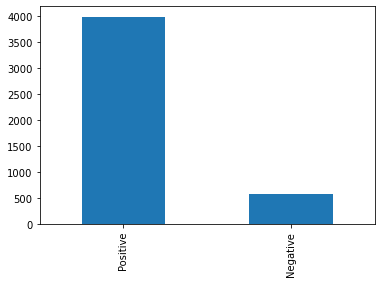

In [92]:
data.Sentiment.value_counts().plot.bar()

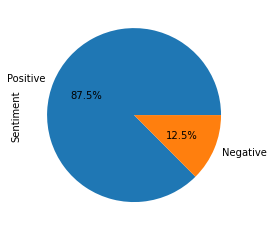

In [93]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");